In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed 
seed(42)
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing only the first 30000 rows
df = pd.read_csv('./data/Asteroid.csv',nrows = 30000)

In [3]:
df.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [4]:
#Checking which columns(features) have nan values
for column in df.columns:
    print(column, df[column].isna().sum()/df.shape[0]) #returns the fraction of NAN values

full_name 0.0
a 0.0
e 0.0
G 0.9961666666666666
i 0.0
om 0.0
w 0.0
q 0.0
ad 0.0
per_y 0.0
data_arc 0.0
condition_code 0.0
n_obs_used 0.0
H 0.0
diameter 0.2462
extent 0.9995
albedo 0.2468
rot_per 0.7246333333333334
GM 0.9996
BV 0.9660666666666666
UB 0.9674666666666667
IR 1.0
spec_B 0.9515333333333333
spec_T 0.9674666666666667
neo 0.0
pha 0.0
moid 0.0


In [5]:
#Printing the first ten unique values of each feature
for column in df.columns:
    print(column, df[column].unique()[:10])

full_name ['     1 Ceres' '     2 Pallas' '     3 Juno' '     4 Vesta'
 '     5 Astraea' '     6 Hebe' '     7 Iris' '     8 Flora'
 '     9 Metis' '    10 Hygiea']
a [2.76916515 2.77246592 2.66914952 2.3614179  2.57424892 2.42515999
 2.38533381 2.20176419 2.38563654 3.14153918]
e [0.07600903 0.23033682 0.25694232 0.08872146 0.19109452 0.20300711
 0.23120579 0.15649925 0.12311427 0.11246066]
G [0.12 0.11 0.32  nan 0.24 0.28 0.17 0.22 0.23 0.2 ]
i [10.59406704 34.83623442 12.98891913  7.14177081  5.36698794 14.7379011
  5.52365139  5.88695456  5.57681551  3.83156003]
om [ 80.30553157 173.08006275 169.85275981 103.81080443 141.57660421
 138.64020276 259.56323069 110.88932989  68.9085767  283.20216686]
w [ 73.59769412 310.04885743 248.13862618 150.72854129 358.68760779
 239.80749023 145.26510583 285.28746222   6.41736923 312.31520625]
q [2.5586836  2.13386493 1.98333205 2.15190945 2.08232406 1.93283527
 1.83383082 1.85718974 2.09193063 2.78823962]
ad [2.97964671 3.41106691 3.35496699 2.57

In [6]:
#Steps 0
df['diameter']=pd.to_numeric(df['diameter'],errors='coerce') #transforming to numeric, setting errors to NaN
dropindexes = df['diameter'][df['diameter'].isnull()].index #rows with nan diameters to drop
dropped_df = df.loc[dropindexes] #saving dropped rows for the future
df = df.drop(dropindexes, axis=0) 

In [7]:
#Steps 1
tooMuchNa = df.columns[df.isna().sum()/df.shape[0] > 0.5]
df = df.drop(tooMuchNa,axis=1)
df = df.drop(['condition_code','full_name'],axis=1)
df = df.drop(['neo','pha'],axis=1)

In [8]:
#Step 2
df = df.fillna(df.mean())

In [9]:
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,1002,3.34,939.400,0.0900,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,8490,4.13,545.000,0.1010,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,7104,5.33,246.596,0.2140,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,9325,3.20,525.400,0.4228,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431,2861,6.85,106.699,0.2740,1.09589


In [10]:
#Last sanity check for nan values
df.isna().values.any()

False

In [11]:
df = df.drop(['albedo','H'],axis = 1)

In [12]:
df['diameter']= df['diameter'].apply(np.log)
for column in df.columns.drop(['diameter']):
    df['log('+column+')']=df[column].apply(np.log)
df = df.dropna(axis=1)

In [13]:
df.corr()['diameter'].abs().sort_values(ascending=False)

diameter           1.000000
log(a)             0.622497
log(per_y)         0.622497
log(ad)            0.605441
data_arc           0.583459
log(q)             0.533683
n_obs_used         0.526710
log(data_arc)      0.522696
log(moid)          0.504905
a                  0.500553
log(n_obs_used)    0.483892
moid               0.477567
ad                 0.476470
q                  0.473422
per_y              0.316803
i                  0.255413
log(i)             0.211454
log(e)             0.059763
e                  0.055441
w                  0.004292
log(w)             0.004283
log(om)            0.002104
om                 0.001198
Name: diameter, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
predictors = df.drop('diameter',axis=1) 
target = df['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [15]:
X_train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,log(e),log(i),log(om),log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),log(moid)
11845,2.534142,0.121263,4.666368,92.991153,341.723870,2.226844,2.841441,4.034175,16053,1892,...,-2.109792,1.540381,4.532504,5.834003,0.800586,1.044311,1.394802,9.683651,7.545390,0.217021
931,2.420244,0.090319,8.113072,14.973032,49.782882,2.201650,2.638838,3.765277,36309,2317,...,-2.404408,2.093477,2.706251,3.907671,0.789207,0.970339,1.325821,10.499821,7.748029,0.201331
4617,2.627532,0.292301,11.473600,342.891153,61.760667,1.859502,3.395561,4.259220,27297,1270,...,-1.229972,2.440049,5.837413,4.123267,0.620309,1.222469,1.449086,10.214532,7.146772,-0.108178
2290,3.043640,0.065147,24.491739,169.492215,296.486266,2.845355,3.241924,5.310043,40164,2167,...,-2.731107,3.198336,5.132807,5.692001,1.045688,1.176167,1.669600,10.600726,7.681099,0.651981
27554,3.071534,0.061422,10.541331,52.202468,85.381958,2.882874,3.260194,5.383208,7785,915,...,-2.789985,2.355304,3.955130,4.447135,1.058788,1.181787,1.683285,8.959954,6.818924,0.653314


In [16]:
from sklearn import preprocessing

#Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr= std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

X_train_norm = scaler(X_train)
X_test_norm = scaler(X_test)

def inverse_scaler(X):
    x_norm_arr= std_scaler.inverse_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)


In [17]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.distplot(Y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_test,prediction, c='orange',label='predictions')
    ax2.plot(Y_test,Y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated $\log(radius)$')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale
def score(prediction):
    score = r2_score(prediction,Y_test)
    return score
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))
algorithms = []
scores = []

Linear Regression

In [18]:
#Defining the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

###Training
lr.fit(X_train,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test)

###Scoring
score_lr = score(Y_pred_lr)
announce(score_lr)

algorithms.append('LR')
scores.append(score_lr)

The R^2 score achieved using this regression is: 0.792


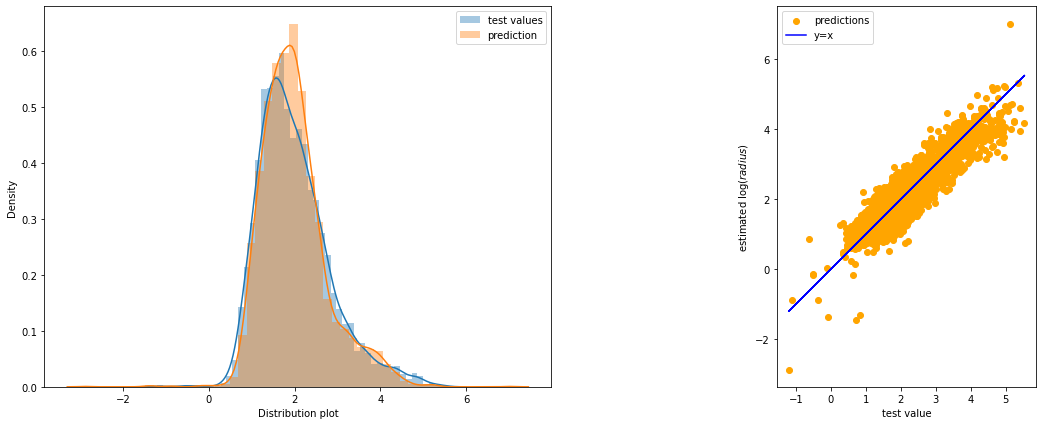

In [19]:
plot(Y_pred_lr)

Elastic Net regression:

In [20]:
### Defining the Model
from sklearn.linear_model import ElasticNetCV
enet = ElasticNetCV(cv=9,max_iter=10000)

### Training
enet.fit(X_train_norm,np.ravel(Y_train))

### Predicting
Y_pred_enet = enet.predict(X_test_norm)

###Scoring
score_enet = score(Y_pred_enet)
announce(score_enet)

algorithms.append('eNet')
scores.append(score_enet)

The R^2 score achieved using this regression is: 0.771


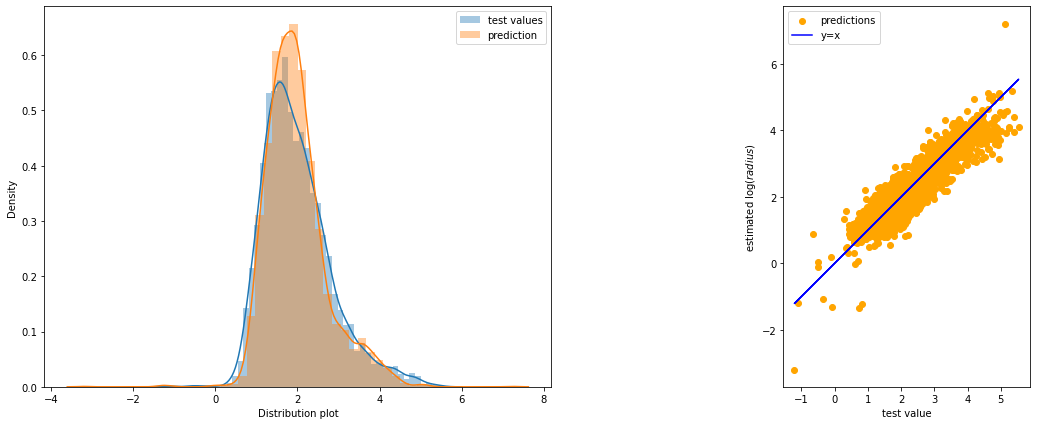

In [21]:
plot(Y_pred_enet)

k-Nearest Neighbours regression:

In [22]:
### Defining the Model

from sklearn.neighbors import KNeighborsRegressor

##For weighted metric, more accurate but longer calculation
#weights = X_train_norm.corrwith(Y_train).abs()
#neigh = KNeighborsRegressor(n_neighbors=3, metric_params={'w' : weights.values}, metric='wminkowski')

neigh = KNeighborsRegressor(n_neighbors=3)

### Training
neigh.fit(X_train_norm,Y_train)

### Predicting 
Y_pred_neigh = neigh.predict(X_test_norm)

### Scoring
score_neigh=score(Y_pred_neigh)
announce(score_neigh)

algorithms.append('k-NN')
scores.append(score_neigh)

The R^2 score achieved using this regression is: 0.769


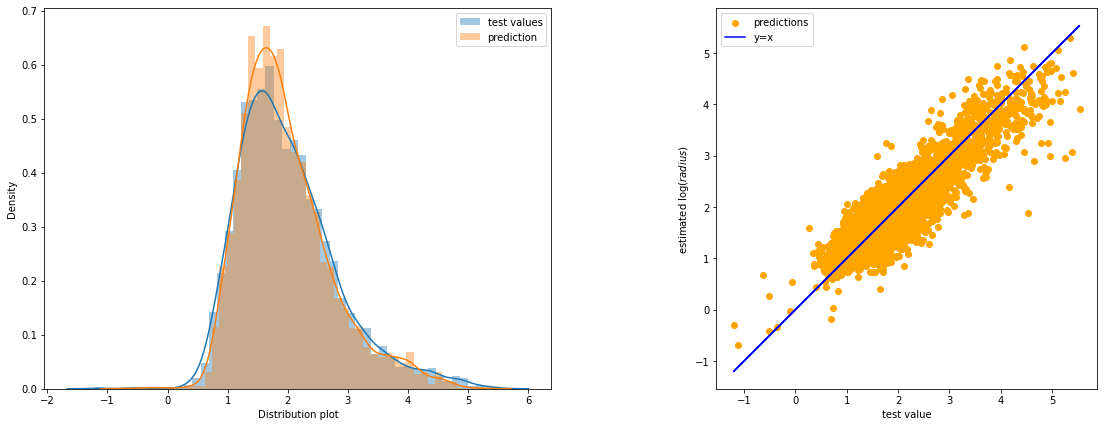

In [23]:
plot(Y_pred_neigh)

Decision Tree regression:

In [24]:
### Defining the model
from sklearn import tree
decTree = tree.DecisionTreeRegressor()

### Training
decTree = decTree.fit(X_train_norm,Y_train)

### Predicting
Y_pred_tree = decTree.predict(X_test_norm)

### Scoring
score_tree = score(Y_pred_tree)
announce(score_tree)

algorithms.append('DTree')
scores.append(score_tree)

The R^2 score achieved using this regression is: 0.687


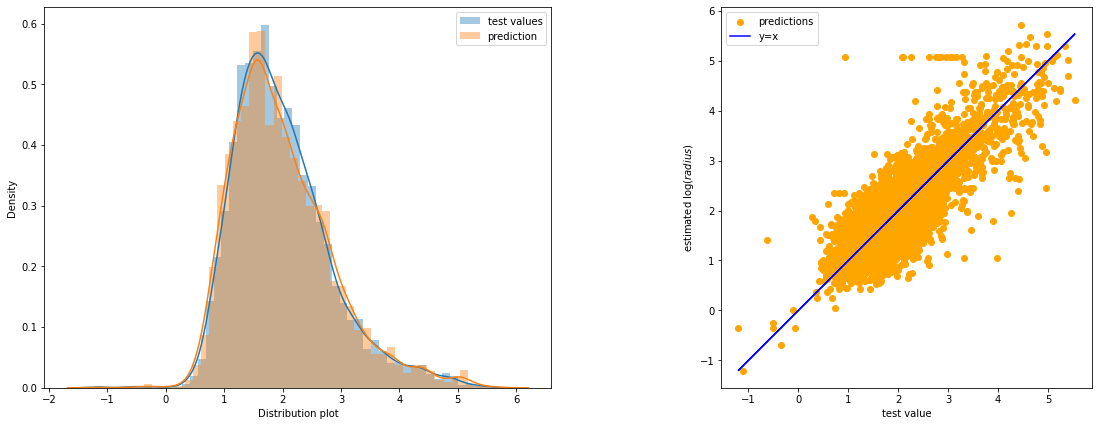

In [25]:
plot(Y_pred_tree)

Random Forest regression:

In [26]:
### Defining the model
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=32, n_estimators=50)

### Training 
forest.fit(X_train_norm,np.ravel(Y_train))

###Predicting
Y_pred_forest = forest.predict(X_test_norm)

### Scoring
score_forest = score(Y_pred_forest)
announce(score_forest)

algorithms.append('RForest')
scores.append(score_forest)

The R^2 score achieved using this regression is: 0.838


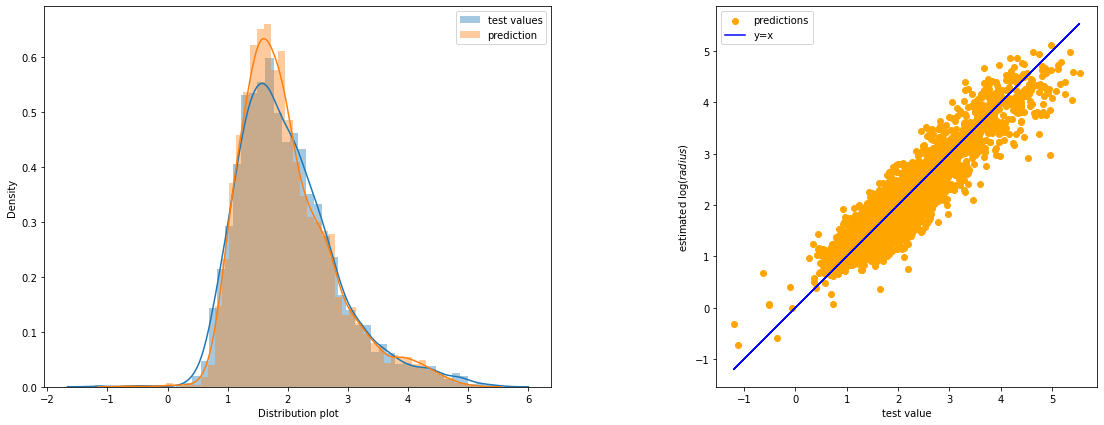

In [27]:
plot(Y_pred_forest)

Support Vector Machine regression: (too slow when n_samples > 30000)

Neural Network regression:

In [ ]:
### Defining the model
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

Adam(learning_rate=0.005)
model = Sequential()
model.add(Dense(24,activation='tanh',input_dim=X_train_norm.shape[1]))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

### Training

model.fit(X_train_norm,Y_train,epochs=10,batch_size=256,verbose=False)

### Predicting

Y_pred_nn = model.predict(X_test_norm)

### Scoring
score_nn = score(Y_pred_nn)
announce(score_nn)

algorithms.append('NNet')
scores.append(score_nn)

In [ ]:
plot(Y_pred_nn)

XGBoost regression:

In [ ]:
### Defining the model
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                         learning_rate = 0.08 ,
                max_depth = 4, n_estimators = 500)

### Training
xgReg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_xgb = xgReg.predict(X_test_norm)

### Scoring
score_xgb = score(Y_pred_xgb)
announce(score_xgb)

algorithms.append('XGB')
scores.append(score_xgb)

In [ ]:
plot(Y_pred_xgb)

In [ ]:
# One bonus of using xgboost is being able to 
# simply see how important the different features where when creating the learners.

fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgReg, height=0.5, ax=ax, importance_type='weight')
plt.show()

Comparing all regression algorithms

In [ ]:
sns.barplot(algorithms,scores)

XGBoosting wins today with an  𝑅2  score of 0.845